<a href="https://colab.research.google.com/github/VielF/ColabProjects/blob/main/Pr%C3%A1tica_Processamento_Morfol%C3%B3gico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí<br>
Escola Politécnica<br>
Processamento Digital de Sinais: Imagens

# Exercício Avalitivo de Processamento Morfológico

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Processamento Morfológico
#### Obs: Utilize imagens em preto e branco.


### Erosão e Dilatação

1. Implemente a sua própria versão da erosão em formato de função, com capacidade de trabalhar com diferentes elementos estruturantes (tamanho e forma) e aplique o algoritmos na na figura ImagensMorfologia/Fig0905(a)(wirebond-mask)
2. Implemente a sua própria versão da dilatação em formato de função, com capacidade de trabalhar com diferentes elementos estruturantes (tamanho e forma) e aplique o algoritmos na na figura ImagensMorfologia/Fig0907(a)(text_gaps_1_and_2_pixels) 
4. Relate as observações visíveis nas imagens de saída com os processamentos aplicados, descrevendo o comportamento visual em relação as bordas, junção, perda de informação e mlhoria na qualidade visual.
5. Aplique o seu algoritmo de detecção de borda (roberts ou sobel) a imagem ImagensMorfologia/Fig0905(a)(wirebond-mask) antes e depois de utilizar a dilatação/erosão e relate os resultados.

#### Dicas
 - Você pode adicionar ruído nas imagens usando a função random_noise: `from skimage.util import random_noise`. Cuidado com o retorno da função, talvez seja necessário regularizar a mesma novamente para o intervalo de 0 à 255. O ruído pode ser intensificado ou excluído com processamento morfológico.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow

#img = cv2.imread('data/Fig0305(a)(DFT_no_log).tif',1)

In [3]:
def create_element(size_x, size_y):
   element = np.zeros((size_x, size_y), dtype = np.uint8)
   for i in range(size_x):
      for j in range(size_y):
         element[i,j] = 255
   return element

def threashold(img_in):
   img_out = np.zeros(img_in.shape)

   for i in range(img_in.shape[0]):
      for j in range(img_in.shape[1]):
         if img_in[i,j] < 127 :
               img_out[i,j] = 0
         else:
               img_out[i,j] = 255 #img_in[i,j]

   img_out = np.array(img_out, dtype = np.uint8)
   return img_out

In [15]:
def add_padding(img, padding_height, padding_width):
    n, m = img.shape
    
    padded_img = np.zeros((n + padding_height * 2, m + padding_width * 2))
    padded_img[padding_height : n + padding_height, padding_width : m + padding_width] = img
    
    return padded_img

def morf_dilate_erode(img, kernel, padding=True, dilate=True):
    # Get dimensions of the kernel
    k_height, k_width = kernel.shape  # Atribui valor à variável k_height, k_width
    
    # Get dimensions of the image
    img_height, img_width = img.shape  # Atribui valor à variável img_height, img_width
    
    # Calculate padding required
    pad_height = k_height // 2  # Atribui valor à variável pad_height
    pad_width = k_width // 2  # Atribui valor à variável pad_width

    
    # Create a padded version of the image to handle edges
    if padding == True:
        padded_img = add_padding(img, pad_height, pad_width)  # Atribui valor à variável padded_img

    # Initialize an output image with zeros
    output = np.zeros((img_height, img_width), dtype=float)  

    if dilate == True: # Analisa se há algum hit entre elemento e janela
      print("Dilate Operation")
      for i_img in range(img_height):  # Loop usando i
         for j_img in range(img_width):  # Loop usando j
               match_element = 0
               for i_kernel in range(k_height):
                  for j_kernel in range(k_width):
                           if (kernel[i_kernel, j_kernel] == 255):
                              if(padded_img[i_img+i_kernel, j_img+j_kernel] == kernel[i_kernel, j_kernel]):  
                                 match_element = 1
               if(match_element == 1):
                  output[i_img, j_img] = 255
               else:
                  output[i_img, j_img] = 0
    else:
      print("Erode Operation")
      for i_img in range(img_height):  # Loop usando i
         for j_img in range(img_width):  # Loop usando j
               match_element = 1
               for i_kernel in range(k_height):
                  for j_kernel in range(k_width):
                           if (kernel[i_kernel, j_kernel] == 255):
                              if(padded_img[i_img+i_kernel, j_img+j_kernel] != kernel[i_kernel, j_kernel]):  # Analisa se não há algum hit entre elemento e janela
                                 match_element = 0
               if(match_element == 0):
                  output[i_img, j_img] = 0
               else:
                  output[i_img, j_img] = 255
    cv2.imshow('in', output)
    cv2.waitKey(0)                                           
    return np.array(output, dtype=np.uint8)

In [ ]:
img = cv2.imread('noisy_fingerprint.tif',0)
element = create_element(3,3)
image_bin = threashold(img)
img_out = morf_dilate_erode(image_bin, element, padding=True, dilate=False)

In [28]:
cv2.imshow('in', image_bin)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Abertura e Fechamento

5. Implemente a sua versão do algoritmo de abertura em forma de função com capacidade de trabalhar com diferentes elementos estruturantes (tamanho e forma)
6. Implemente a sua versão do algoritmo de fechamento em forma de função com capacidade de trabalhar com diferentes elementos estruturantes (tamanho e forma)
7. Aplique o processamento indicado na image abaixo usando a figura ImagensMorfologia/Fig0911(a)(noisy_fingerprint)

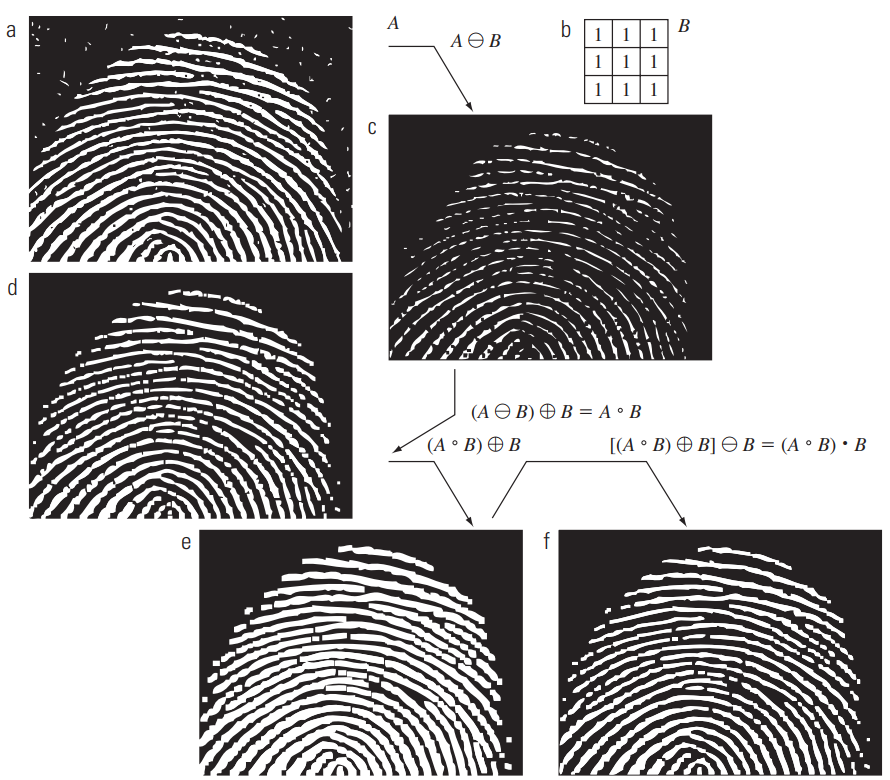